Linear Regression:
Mean Absolute Error: 0.4942675126461207
Mean Squared Error: 0.24614287251590275
Root Mean Squared Error: 0.49612787919638496
R-squared: -0.0007305344370178712
Linear Regression:
Accuracy: 0.569060773480663
Precision: 0.5740740740740741
Recall: 0.9117647058823529
F1-Score: 0.7045454545454545
Confusion Matrix:
 [[ 30 207]
 [ 27 279]]

K-Nearest Neighbors:
Accuracy: 0.4990791896869245
Precision: 0.49377100237685434
Recall: 0.49371225283362286
F1-Score: 0.4934979423868312
Confusion Matrix:
 [[107 130]
 [142 164]]

Decision Tree:
Accuracy: 0.5451197053406999
Precision: 0.5411955425986976
Recall: 0.5416976917349219
F1-Score: 0.5409094798815657
Confusion Matrix:
 [[122 115]
 [132 174]]

Support Vector Machine:
Accuracy: 0.5395948434622467
Precision: 0.4225050403225806
Recall: 0.48303962935385125
F1-Score: 0.3807703536109185
Confusion Matrix:
 [[  9 228]
 [ 22 284]]

Naive Bayes:
Accuracy: 0.5322283609576427
Precision: 0.4676832179517785
Recall: 0.4850666004798544
F1-Score: 

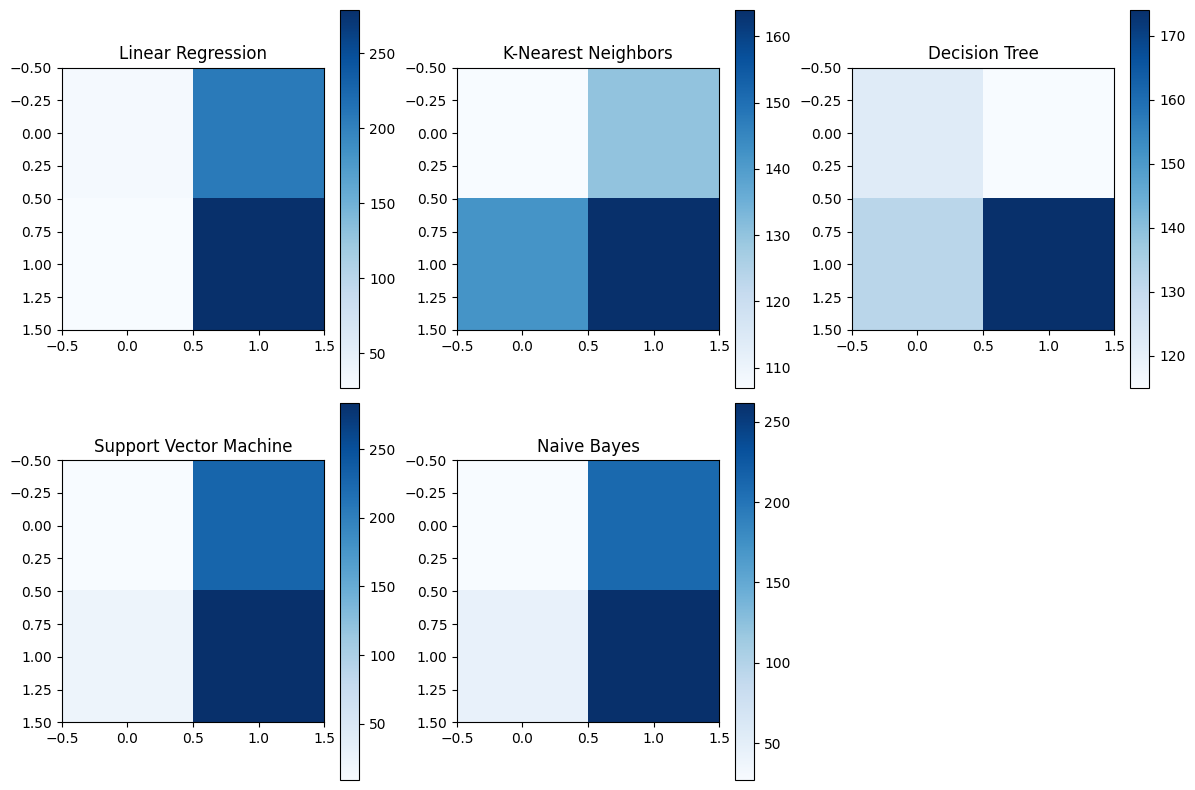

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/BTC-USD (1).csv')

# Split the data into features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = data['Close'].values

# Assuming y contains the closing prices
# Create a binary target variable indicating whether the price went up or down compared to the previous day
y_binary = np.where(y[1:] > y[:-1], 1, 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y_binary, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Convert predictions to discrete classes (e.g., by thresholding)
threshold = 0.5
y_pred_lr_class = np.where(y_pred_lr > threshold, 1, 0)


# Calculate performance metrics for Linear Regression
print("Linear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R-squared:", r2_score(y_test, y_pred_lr))

# Calculate classification metrics
print("Linear Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_class))
print("Precision:", precision_score(y_test, y_pred_lr_class))
print("Recall:", recall_score(y_test, y_pred_lr_class))
print("F1-Score:", f1_score(y_test, y_pred_lr_class))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_class))

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
# Calculate performance metrics for KNN
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_knn, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
# Calculate performance metrics for Decision Tree
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='macro'))
print("Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_dt, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
# Calculate performance metrics for SVM
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='macro'))
print("Recall:", recall_score(y_test, y_pred_svm, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_svm, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
# Calculate performance metrics for Naive Bayes
print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='macro'))
print("Recall:", recall_score(y_test, y_pred_nb, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_nb, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Compute confusion matrices for each model
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr_class)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix for each algorithm
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Linear Regression")
plt.imshow(conf_matrix_lr, cmap='Blues')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.title("K-Nearest Neighbors")
plt.imshow(conf_matrix_knn, cmap='Blues')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.title("Decision Tree")
plt.imshow(conf_matrix_dt, cmap='Blues')
plt.colorbar()

plt.subplot(2, 3, 4)
plt.title("Support Vector Machine")
plt.imshow(conf_matrix_svm, cmap='Blues')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.title("Naive Bayes")
plt.imshow(conf_matrix_nb, cmap='Blues')
plt.colorbar()

plt.tight_layout()
plt.show()


Random Forest Metrics:
Accuracy: 0.5082872928176796
Precision: 0.5639344262295082
Recall: 0.5620915032679739
F1-Score: 0.563011456628478
Confusion Matrix: [[104 133]
 [134 172]]

AdaBoost Metrics:
Accuracy: 0.5082872928176796
Precision: 0.5517241379310345
Recall: 0.6797385620915033
F1-Score: 0.6090775988286969
Confusion Matrix: [[ 68 169]
 [ 98 208]]


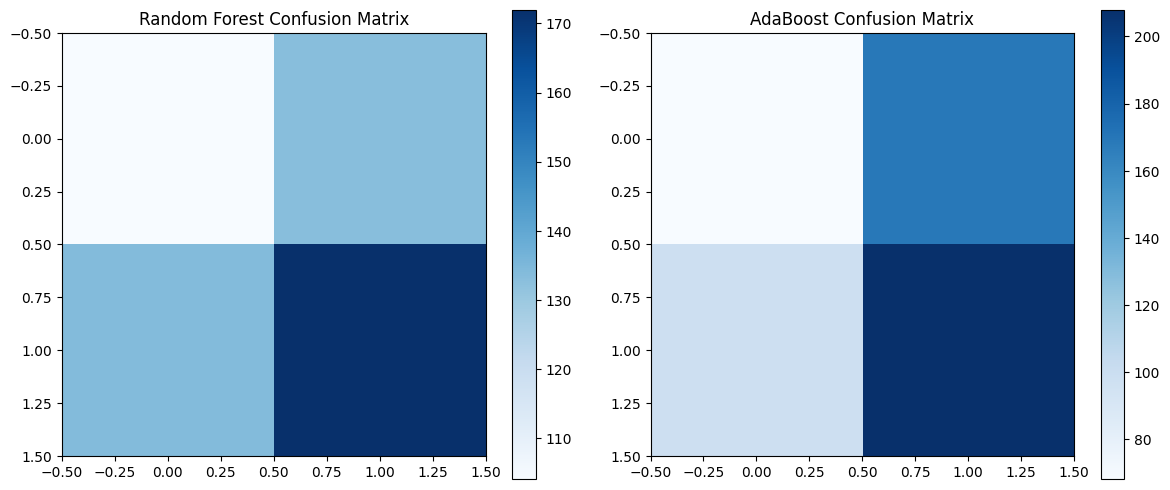

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/BTC-USD (1).csv')

# Split the data into features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = data['Close'].values

# Convert the target variable into classes (up or down)
y_binary = np.where(y[1:] > y[:-1], 1, 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y_binary, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# AdaBoost
adb = AdaBoostClassifier(random_state=42)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)

# Compute evaluation metrics
metrics_rf = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf)
}

metrics_adb = {
    'Accuracy': accuracy_score(y_test, y_pred_adb),
    'Precision': precision_score(y_test, y_pred_adb),
    'Recall': recall_score(y_test, y_pred_adb),
    'F1-Score': f1_score(y_test, y_pred_adb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_adb)
}

# Print evaluation metrics
print("Random Forest Metrics:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value}")

print("\nAdaBoost Metrics:")
for metric, value in metrics_adb.items():
    print(f"{metric}: {value}")

# Plot confusion matrices separately
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Random Forest Confusion Matrix")
plt.imshow(metrics_rf['Confusion Matrix'], cmap='Blues')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("AdaBoost Confusion Matrix")
plt.imshow(metrics_adb['Confusion Matrix'], cmap='Blues')
plt.colorbar()

plt.tight_layout()
plt.show()


Gradient Boosting Metrics:
Accuracy: 0.5138121546961326
Precision: 0.5509708737864077
Recall: 0.7418300653594772
F1-Score: 0.6323119777158774
Confusion Matrix: [[ 52 185]
 [ 79 227]]

XGBoost Metrics:
Accuracy: 0.5414364640883977
Precision: 0.5910543130990416
Recall: 0.6045751633986928
F1-Score: 0.5977382875605814
Confusion Matrix: [[109 128]
 [121 185]]


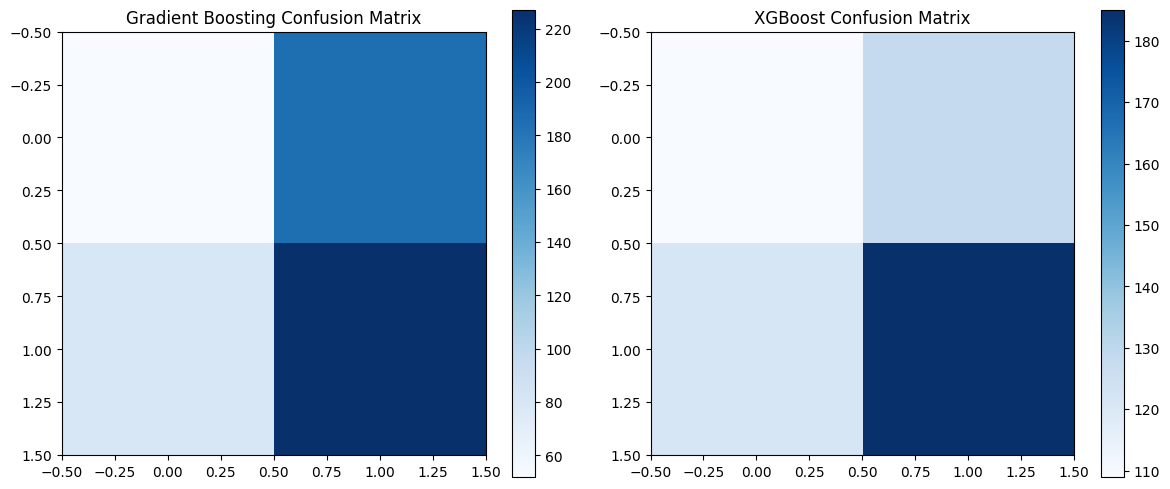

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/BTC-USD (1).csv')

# Split the data into features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = data['Close'].values

# Convert the target variable into classes (up or down)
y_binary = np.where(y[1:] > y[:-1], 1, 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y_binary, test_size=0.2, random_state=42)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Compute evaluation metrics
metrics_gb = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1-Score': f1_score(y_test, y_pred_gb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_gb)
}

metrics_xgb = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_xgb)
}

# Print evaluation metrics
print("Gradient Boosting Metrics:")
for metric, value in metrics_gb.items():
    print(f"{metric}: {value}")

print("\nXGBoost Metrics:")
for metric, value in metrics_xgb.items():
    print(f"{metric}: {value}")

# Plot confusion matrices separately
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Gradient Boosting Confusion Matrix")
plt.imshow(metrics_gb['Confusion Matrix'], cmap='Blues')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("XGBoost Confusion Matrix")
plt.imshow(metrics_xgb['Confusion Matrix'], cmap='Blues')
plt.colorbar()

plt.tight_layout()
plt.show()


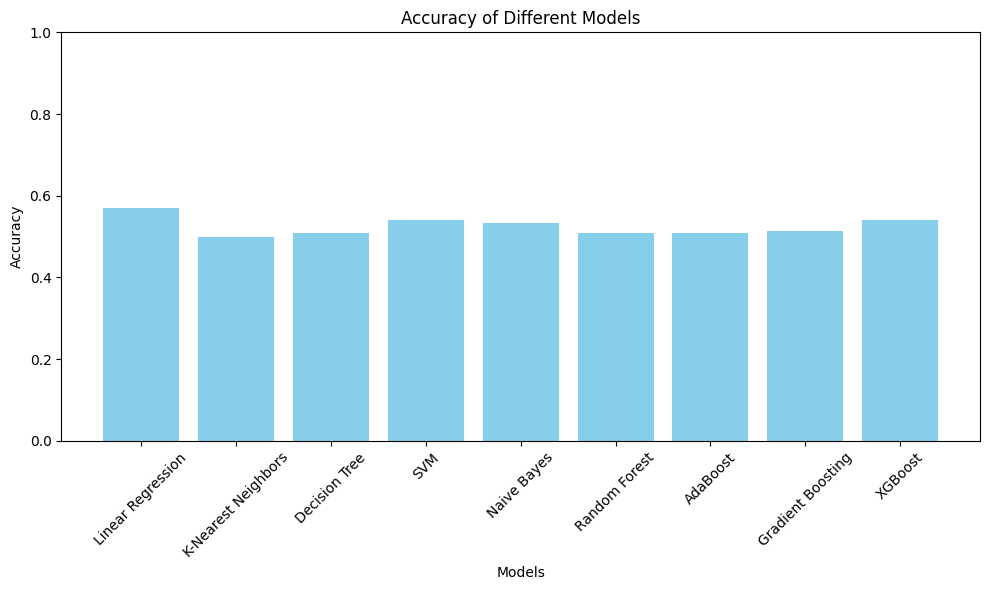

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/BTC-USD (1).csv')

# Split the data into features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
y = data['Close'].values

# Convert the target variable into classes (up or down)
y_binary = np.where(y[1:] > y[:-1], 1, 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y_binary, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and evaluate each model
accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)
    if name == 'Linear Regression':
        y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)  # Thresholding predictions
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
